In [ ]:
# autoreload .py files
%load_ext autoreload
%autoreload 2  
import utility

from utility import load_dataset,tfidf_preprocessing,keras_text_preprocessing
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import numpy as np
import tensorflow as tf

from tensorflow import keras

from tensorflow.keras.layers import TextVectorization

DATASET = 4 # so functiona com train test val, o resto não têm val
batch_size = 256*2

# TODO subword gram com modelo pretrained 
# Outros grams? Count 
# Experimentar outros params, MAX_TOKEN, NN params etc.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
train, test, val = load_dataset(DATASET)

RESULTS = {}

def tabular_pipeline(model_name,text_vectorization,max_len,
                     # train, test, val,
                     hidden_dims=[64,32,16],dropout = 0.2  ):
    tf_train,tf_test,tf_val = keras_text_preprocessing(train,test,val,text_vectorization,batch_size)    
    model = utility.get_dnn_model(max_tokens= max_len, hidden_dims = hidden_dims,dropout = dropout)
    model.summary()
    history,metrics_train = utility.train_model(model,model_name,tf_train,tf_val)

    utility.plot_losses(history)
    
    metrics_test = utility.test_model(model,tf_test)

    return metrics_train | metrics_test 


## Bag of words

#### Single words (unigrams) with binary encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('in'), np.str_('and'), np.str_('a'), np.str_('to'), np.str_('was'), np.str_('is'), np.str_('he'), np.str_('as'), np.str_('for'), np.str_('on'), np.str_('by'), np.str_('with'), np.str_('his'), np.str_('at'), np.str_('from'), np.str_('it'), np.str_('an'), np.str_('that'), np.str_('has'), np.str_('also'), np.str_('are'), np.str_('which'), np.str_('born'), np.str_('she'), np.str_('or'), np.str_('first'), np.str_('her'), np.str_('who'), np.str_('its'), np.str_('one'), np.str_('university'), np.str_('after'), np.str_('new'), np.str_('been'), np.str_('their'), np.str_('be'), np.str_('were'), np.str_('american'), np.str_('known'), np.str_('two'), np.str_('this'), np.str_('but'), np.str_('they'), np.str_('where'), np.str_('including'), np.str_('had'), np.str_('during'), np.str_('most'), np.str_('school'), np.str_('have'), np.str_('album'), np.str_('other'), np.str_('became'), np.str_('united'), np.str_('film'), np.str_('–'), np.str_('world'), np.

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,689 (1.23 MB)

 Trainable params: 322,689 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.6697 - loss: 0.5976 - val_accuracy: 0.9280 - val_loss: 0.2440
Epoch 2/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ -1s -2996us/step - accuracy: 0.9073 - loss: 0.2700 - val_accuracy: 0.9435 - val_loss: 0.1591
Epoch 3/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9353 - loss: 0.1900 - val_accuracy: 0.9487 - val_loss: 0.1407
Epoch 4/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9436 - loss: 0.1629 - val_accuracy: 0.9508 - val_loss: 0.1335
Epoch 5/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9495 - loss: 0.1471 - val_accuracy: 0.9522 - val_loss: 0.1297
Epoch 6/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9516 - loss: 0.1380 - val_accuracy: 0.9534 - val_loss: 0.1273
Epoch 7/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9557 - loss: 0.1296 - val_accuracy: 0.9540 - val_loss: 0.1253
Epoch 8/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9576 - loss: 0.12

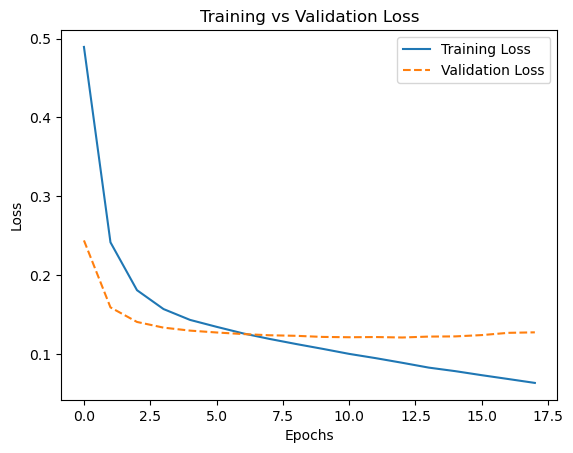

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9570 - loss: 0.1250


2025-03-19 04:12:44.123499: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22500
           1       0.96      0.96      0.96     22500

    accuracy                           0.96     45000
   macro avg       0.96      0.96      0.96     45000
weighted avg       0.96      0.96      0.96     45000

[[21504   996]
 [  986 21514]]


In [16]:
MAX_TOKENS = 5000 # experimentar com outros valores, 5k 10k 20k
NAME = "unigram_be.keras"

text_vectorization_singlegram_be = TextVectorization(
    max_tokens= MAX_TOKENS,
    output_mode="multi_hot",
    standardize = "lower_and_strip_punctuation",
)

RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_singlegram_be,MAX_TOKENS)

#### Bigrams with binary encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('in'), np.str_('and'), np.str_('a'), np.str_('to'), np.str_('was'), np.str_('is'), np.str_('he'), np.str_('of the'), np.str_('as'), np.str_('for'), np.str_('on'), np.str_('in the'), np.str_('by'), np.str_('with'), np.str_('his'), np.str_('at'), np.str_('from'), np.str_('it'), np.str_('an'), np.str_('that'), np.str_('is a'), np.str_('has'), np.str_('also'), np.str_('are'), np.str_('at the'), np.str_('to the'), np.str_('which'), np.str_('born'), np.str_('she'), np.str_('or'), np.str_('first'), np.str_('and the'), np.str_('as a'), np.str_('on the'), np.str_('her'), np.str_('who'), np.str_('its'), np.str_('one'), np.str_('he was'), np.str_('university'), np.str_('after'), np.str_('new'), np.str_('was a'), np.str_('been'), np.str_('for the'), np.str_('their'), np.str_('be'), np.str_('were'), np.str_('american'), np.str_('by the'), np.str_('known'), np.str_('two'), np.str_('it is'), np.str_('this'), np.str_('from the'), np.str_('but'), np.str_

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,689 (1.23 MB)

 Trainable params: 322,689 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.7300 - loss: 0.5394 - val_accuracy: 0.9418 - val_loss: 0.1677
Epoch 2/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9296 - loss: 0.1974 - val_accuracy: 0.9563 - val_loss: 0.1210
Epoch 3/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9507 - loss: 0.1432 - val_accuracy: 0.9599 - val_loss: 0.1101
Epoch 4/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9578 - loss: 0.1227 - val_accuracy: 0.9618 - val_loss: 0.1051
Epoch 5/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9618 - loss: 0.1121 - val_accuracy: 0.9621 - val_loss: 0.1032
Epoch 6/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9649 - loss: 0.1016 - val_accuracy: 0.9630 - val_loss: 0.1016
Epoch 7/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9676 - loss: 0.0956 - val_accuracy: 0.9636 - val_loss: 0.1004
Epoch 8/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9703 - loss: 0.0904 - 

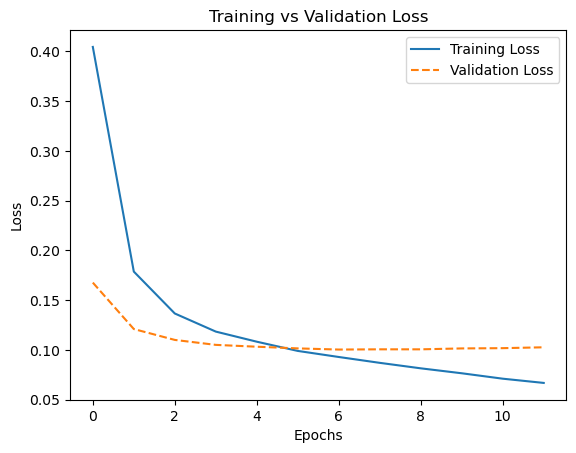

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9639 - loss: 0.1013
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
              precision    recall  f1-score   support

           0       0.96      0.96      0.96     22500
           1       0.96      0.96      0.96     22500

    accuracy                           0.96     45000
   macro avg       0.96      0.96      0.96     45000
weighted avg       0.96      0.96      0.96     45000

[[21628   872]
 [  801 21699]]


In [17]:
MAX_TOKENS = 5000 # experimentar com outros valores, 5k 10k 20k
NAME = "bigram_be.keras"

text_vectorization_bigram_be = TextVectorization(
    ngrams=2,
    max_tokens=MAX_TOKENS,
    output_mode="multi_hot",
)
RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_bigram_be,MAX_TOKENS)

#### Bigrams with TF-IDF encoding

['[UNK]', np.str_('the'), np.str_('of'), np.str_('in'), np.str_('and'), np.str_('a'), np.str_('to'), np.str_('was'), np.str_('is'), np.str_('he'), np.str_('of the'), np.str_('as'), np.str_('for'), np.str_('on'), np.str_('in the'), np.str_('by'), np.str_('with'), np.str_('his'), np.str_('at'), np.str_('from'), np.str_('it'), np.str_('an'), np.str_('that'), np.str_('is a'), np.str_('has'), np.str_('also'), np.str_('are'), np.str_('at the'), np.str_('to the'), np.str_('which'), np.str_('born'), np.str_('she'), np.str_('or'), np.str_('first'), np.str_('and the'), np.str_('as a'), np.str_('on the'), np.str_('her'), np.str_('who'), np.str_('its'), np.str_('one'), np.str_('he was'), np.str_('university'), np.str_('after'), np.str_('new'), np.str_('was a'), np.str_('been'), np.str_('for the'), np.str_('their'), np.str_('be'), np.str_('were'), np.str_('american'), np.str_('by the'), np.str_('known'), np.str_('two'), np.str_('it is'), np.str_('this'), np.str_('from the'), np.str_('but'), np.str_

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)      │ (None, 5000)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 64)             │       320,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 322,689 (1.23 MB)

 Trainable params: 322,689 (1.23 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.5407 - loss: 1.8204 - val_accuracy: 0.8999 - val_loss: 0.3001
Epoch 2/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8709 - loss: 0.3228 - val_accuracy: 0.9433 - val_loss: 0.1583
Epoch 3/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9343 - loss: 0.1848 - val_accuracy: 0.9555 - val_loss: 0.1252
Epoch 4/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9505 - loss: 0.1424 - val_accuracy: 0.9598 - val_loss: 0.1126
Epoch 5/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9578 - loss: 0.1219 - val_accuracy: 0.9625 - val_loss: 0.1051
Epoch 6/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9630 - loss: 0.1086 - val_accuracy: 0.9639 - val_loss: 0.0998
Epoch 7/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ -2s -3779us/step - accuracy: 0.9671 - loss: 0.0980 - val_accuracy: 0.9655 - val_loss: 0.0969
Epoch 8/5000
411/411 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9694 - loss: 0.09

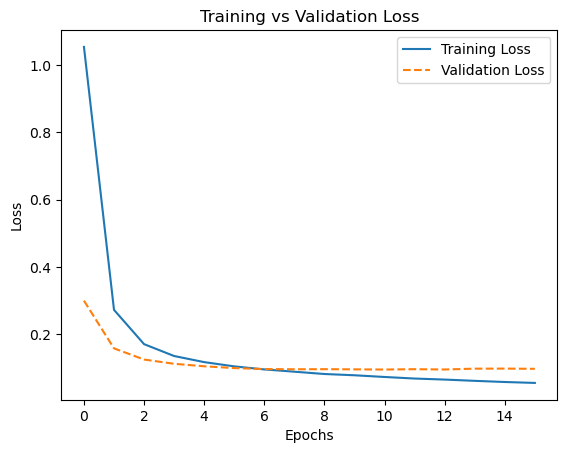

88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9673 - loss: 0.1004


2025-03-19 04:17:52.770958: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97     22500
           1       0.97      0.96      0.97     22500

    accuracy                           0.97     45000
   macro avg       0.97      0.97      0.97     45000
weighted avg       0.97      0.97      0.97     45000

[[21864   636]
 [  815 21685]]


In [18]:
MAX_TOKENS = 5000 # experimentar com outros valores, 5k 10k 20k

NAME = "bigram_tf_idf.keras"
text_vectorization_bigram_tf_idf = TextVectorization(
    ngrams=2,
    max_tokens=MAX_TOKENS,
    output_mode="tf_idf",
)
RESULTS[NAME] = tabular_pipeline(NAME,text_vectorization_bigram_tf_idf,MAX_TOKENS)

### Subword gram

In [ ]:
# A fazer 
from transformers import AutoTokenizer

# Load a pretrained BPE tokenizer 
#GPT-2	BPE (Byte-level)
#RoBERTa	BPE
#XLM-RoBERTa	BPE
#OpenAI CLIP	BPE
#T5	SentencePiece BPE

# https://huggingface.co/docs/transformers/main/en/model_doc/roberta#transformers.RobertaTokenizer
# Outros https://huggingface.co/docs/transformers/main/en/model_doc/auto#transformers.AutoTokenizer.from_pretrained


#Constructs a RoBERTa tokenizer, derived from the GPT-2 tokenizer, using byte-level Byte-Pair-Encoding.
#This tokenizer has been trained to treat spaces like parts of the tokens (a bit like sentencepiece) so a word will
#be encoded differently whether it is at the beginning of the sentence (without space) or not:

# Para além disto também usa ponctuação como tokens
tokenizer_bpe = AutoTokenizer.from_pretrained("FacebookAI/roberta-base")

# Example text
text =  ["The cat is crying a lot! Going chasing.  Lasted, chased, summarization"] 

# "summarization" foi dividido em 2 'Ġsummar', 'ization'
#  "Lasted" tambem 'ĠLast', 'ed'


tokens = tokenizer_bpe.tokenize(text[0])
ids = tokenizer_bpe.convert_tokens_to_ids(tokens)

print(tokens)

['The', 'Ġcat', 'Ġis', 'Ġcrying', 'Ġa', 'Ġlot', '!', 'ĠGoing', 'Ġchasing', '.', 'Ġ', 'ĠLast', 'ed', ',', 'Ġchased', ',', 'Ġsummar', 'ization']


# Final results

In [20]:
from pprint import pprint
pprint(RESULTS)

{'bigram_be.keras': {'test_accuracy': 0.9628221988677979,
                     'test_loss': 0.10202962160110474,
                     'train_accuracy': 0.9787904620170593,
                     'train_loss': 0.06684689223766327,
                     'val_accuracy': 0.9656000137329102,
                     'val_loss': 0.1026608869433403},
 'bigram_tf_idf.keras': {'test_accuracy': 0.9677555561065674,
                         'test_loss': 0.10136653482913971,
                         'train_accuracy': 0.9828285574913025,
                         'train_loss': 0.05568830296397209,
                         'val_accuracy': 0.9699333310127258,
                         'val_loss': 0.0976090133190155},
 'unigram_be.keras': {'test_accuracy': 0.9559555649757385,
                      'test_loss': 0.12619125843048096,
                      'train_accuracy': 0.9805523753166199,
                      'train_loss': 0.0633397251367569,
                      'val_accuracy': 0.9610666632652283,
         